# [International football results from 1872 to 2025](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017)

Aqui está um dataset de resultados de futebol nesses anos;
- Será utilizado para a atividade de regressão utilizando seu modelo em JSON, usando Pycaret;

,Description,Value
0,Session id,123
1,Target,home_score
2,Target type,Regression
3,Original data shape,"(48673, 9)"
4,Transformed data shape,"(48673, 7)"
5,Transformed train set shape,"(34071, 7)"
6,Transformed test set shape,"(14602, 7)"
7,Ignore features,2
8,Categorical features,5
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.1672,2.5308,1.5903,0.1800,0.5603,0.4890,1.1840
xgboost,Extreme Gradient Boosting,1.1717,2.5631,1.6005,0.1693,0.5615,0.5048,0.7030
gbr,Gradient Boosting Regressor,1.1759,2.5661,1.6013,0.1687,0.5647,0.4903,2.5930
br,Bayesian Ridge,1.1959,2.6495,1.6270,0.1420,0.5737,0.5116,0.2460
lr,Linear Regression,1.1959,2.6498,1.6271,0.1419,0.5738,0.5117,1.4560
ridge,Ridge Regression,1.1959,2.6497,1.6271,0.1419,0.5738,0.5117,0.3040
lar,Least Angle Regression,1.1959,2.6498,1.6271,0.1419,0.5738,0.5117,0.2470
huber,Huber Regressor,1.1686,2.6865,1.6382,0.1303,0.5570,0.4666,0.4100
omp,Orthogonal Matching Pursuit,1.2330,2.8024,1.6732,0.0926,0.5913,0.4932,0.3520
rf,Random Forest Regressor,1.2359,2.8192,1.6785,0.0864,0.5890,0.5626,11.3420


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.1740,2.6267,1.6207,0.2329,0.5552,0.5105
1,1.1556,2.3990,1.5489,0.1692,0.5594,0.5031
2,1.1691,2.6574,1.6301,0.2039,0.5575,0.5073
3,1.1653,2.5244,1.5888,0.2017,0.5607,0.4973
4,1.1530,2.3404,1.5298,0.1914,0.5545,0.4928
5,1.1711,2.5483,1.5963,0.1649,0.5646,0.5142
6,1.1336,2.3633,1.5373,0.1864,0.5470,0.5017
7,1.1212,2.2218,1.4906,0.1852,0.5484,0.5050
8,1.1562,2.5536,1.5980,0.1911,0.5625,0.5045


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

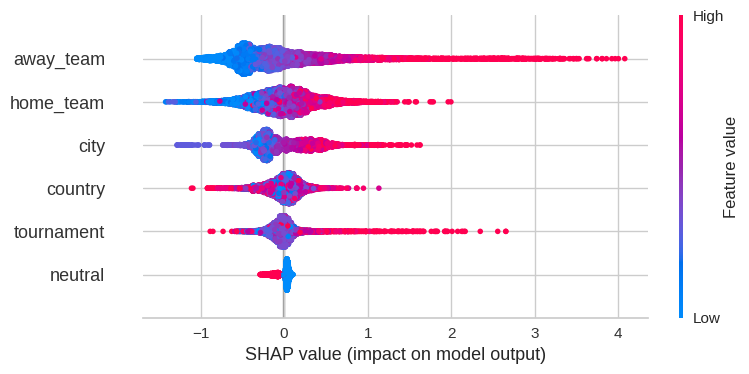

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [3]:
# =======================================
# Importação das bibliotecas
# =======================================
import pandas as pd
from pycaret.regression import *

# =======================================
# Leitura do dataset principal
# =======================================
url = "https://raw.githubusercontent.com/martj42/international_results/master/results.csv"
df = pd.read_csv(url)
df.head()

# =======================================
# Explicação dos atributos
# =======================================
# date: data do jogo
# home_team: time da casa
# away_team: time visitante
# home_score: gols do time da casa (variável alvo)
# away_score: gols do time visitante
# tournament: nome do torneio
# city: cidade onde foi realizado
# country: país onde foi realizado
# neutral: True se o jogo foi em campo neutro

# =======================================
# Configuração do PyCaret
# =======================================
reg = setup(
    data=df,
    target='home_score',
    session_id=123,
    ignore_features=['date', 'away_score'],
    categorical_features=['home_team', 'away_team', 'tournament', 'city', 'country']
)

# =======================================
# Comparar e ajustar modelos
# =======================================
best = compare_models()
tuned = tune_model(best)

# =======================================
# Avaliação e interpretação
# =======================================
evaluate_model(tuned)
interpret_model(tuned)

# =======================================
# Modelo final
# =======================================
final_model = finalize_model(tuned)
